In [1]:
# Imports

import sys
import numpy as np
from numpy import polyfit
from matplotlib import pyplot as plt

plt.style.use("ggplot")

In [2]:
# Define-se classes para funcoes lineares com possibilidade de computacao a partir de 2 pontos:

class Linear:

    def __init__(self, b=None, m=None, compute=False, data=None):

        self.b = b
        self.m = m

        if compute:
            self.m, self.b = np.polyfit(data[0], data[1], 1)

    def infer(self, x):
        return x*self.m + self.b

    def plot(self, b=0, e=1, show=False, c="red", legend=None):
        x = np.linspace(b, e, 500)
        y = [self.infer(_x) for _x in x]

        if legend is not None:
            plt.plot(x, y, c=c, label=legend)

        plt.plot(x, y, c=c)

        if show:
            plt.show()

In [3]:
# Define-se funcoes de pertinencia triangular e gaussiana
class Linear:

    def __init__(self, b=None, m=None, compute=False, data=None):

        self.b = b
        self.m = m

        if compute:
            self.m, self.b = np.polyfit(data[0], data[1], 1)

    def infer(self, x):
        return x*self.m + self.b

    def plot(self, b=0, e=1, show=False, c="red", legend=None):
        x = np.linspace(b, e, 500)
        y = [self.infer(_x) for _x in x]

        if legend is not None:
            plt.plot(x, y, c=c, label=legend)

        plt.plot(x, y, c=c)

        if show:
            plt.show()

class Gaussmf(Linear):

    def __init__(self, c, sigma):
        self.c = c
        self.sigma = sigma

    def infer(self, x):
        return np.exp(-np.power(x - self.c, 2.) / (2 * np.power(self.sigma, 2.)))

class Trimf(Linear):

    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def infer(self, x):

        if x <= self.a:
            return 0
        if x <= self.b:
            return (x-self.a)/(self.b-self.a)
        if x <= self.c:
            return (self.c-x)/(self.c-self.b)

        return 0
    


In [4]:
# Define-se classe para inferencia de Sungeno

class Sugeno():

    def __init__(self, antecedents, consequents):
        
        #assert(len(consequents) == len(antecedents))
        self.consequents = consequents
        self.antecedents = antecedents

    def infer(self, x):
        weights = [ant.infer(x) for ant in self.antecedents]
        consequent_values = [con.infer(x) for con in self.consequents]

        output = 0
        for (w, cm) in zip(weights, consequent_values):
            output += w*cm

        normal_output = output/sum(weights)

        return normal_output

In [5]:
# Define-se funcao para criacao de consequentes de ordem 1

def create_con(px=None, py=None, n_points=None):

    if px is not None: # caso onde px eh passado

        pass

    else:

        px = np.linspace(0, 2*p, n_points)
        py = [np.sin(x) for x in px]

    n_consequents = len(px) - 1
    con = []

    for i in range(n_consequents):
        l = Linear(compute=True, data=(px[i:i+2], py[i:i+2])) #consequentes de ordem 1
        con.append(l)

    return con, n_consequents




In [6]:
# Define-se funcao para criacao de antecedentes triangulares ou gaussianos

def create_ant(px, n_cons, gs=1.2, tri=True):

    centers = np.linspace(px[0], px[-1], n_consequents)

    s = (px[1] - px[0])*2

    if tri:

       ant = [Trimf(c-s, c, c+s) for c in centers]

    else:
        ant = [Gaussmf(c, gs) for c in centers]

    return ant, centers, s

In [7]:
# Define-se funcao para visualizacao de espaco de inferencia

def see_inference(px, con, ant, centers, s, mse):

# Plot de consequentes

    for cc, cons in enumerate(con[:-1]):
        cons.plot(px[cc], px[cc+1])

    con[-1].plot(px[n_consequents - 1], px[n_consequents], legend="Consequentes")

# plotta antecedentes
# antecentedes iniciais e finais sao clippados para o dominio de interesse

    first_c = centers[0]
    last_c = centers[len(centers)-1]

    ant[0].plot(first_c, first_c + s, c="blue")

    ant[len(ant) - 1].plot(last_c - s, last_c, c="blue", legend="Antecedentes")

    for (a, c) in zip(ant[1:n_consequents-1], centers[1:n_consequents-1]):
        a.plot(c - s, c + s, c="blue")
    plt.plot(x, y, c="black", label="Função aproximada")
    plt.plot(x, y_hat,"--", c="black", label="Aproximação")

    plt.plot([], label = f"Erro: {mse:.3f}", c="white")

    plt.legend()
    plt.show()


In [8]:
# Carrega valor de pi

p = 3.14

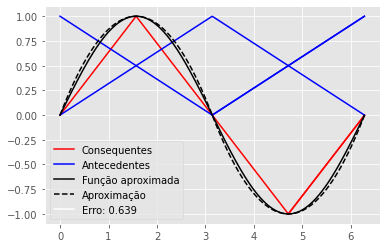

In [9]:
# letra a:

# Pontos sao escolhidos por inspecao da funcao seno

px = [0, p/2, 3*p/2, 2*p]
py = [np.sin(x) for x in px]

# Consequentes e antecedentes triangulares sao criados

con, n_consequents = create_con(px, py)

ant, centers, s = create_ant(px, n_consequents, tri=True)

# Inferencia e erro

sugeno = Sugeno(ant, con)

x = np.linspace(px[0], px[n_consequents], 500)
y = [np.sin(_x) for _x in x]
y_hat = np.array([sugeno.infer(_x) for _x in x])

mse = np.sum((y - y_hat) ** 2)

# visualizacao

see_inference(px, con, ant, centers, s, mse)


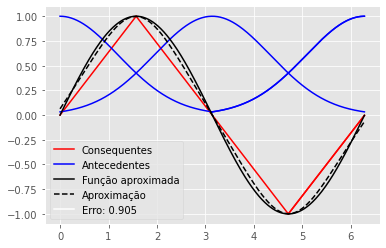

In [10]:
# letra b: 

# Redefinicao de antecedentes

ant, centers, s = create_ant(px, n_consequents, 1.2, tri=False)

# Inferencia e erro

sugeno = Sugeno(ant, con)
y_hat = np.array([sugeno.infer(_x) for _x in x])

mse = np.sum((y - y_hat) ** 2)

# visualizacao

see_inference(px, con, ant, centers, s, mse)




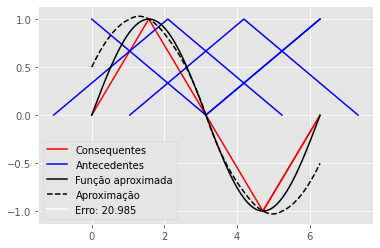

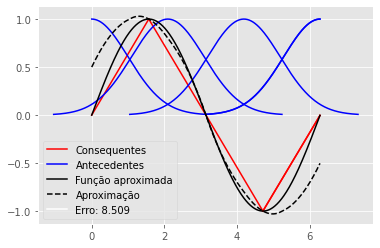

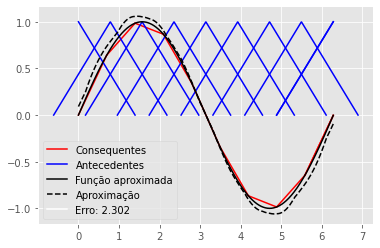

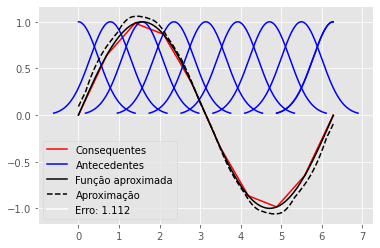

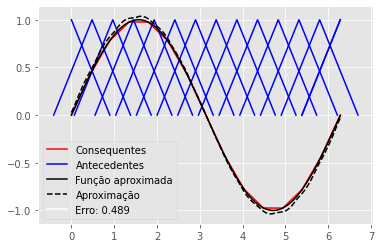

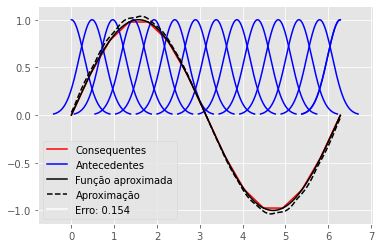

In [11]:
# letra c:
# O número de pontos é aumentado e o processo de inferência é repetido com ambos antecedentes

# Nota-se que para pequenos numeros de pontos sua posicao é bem relevante para o erro, tornando processo de
# escolha automatica uma ma ideia. Se os pontos forem escolhidos por inspecao, no entanto (como nas letras a e b)
# o erro é bem minimizado. A medida que o numero de pontos aumenta a diferenca a relevancia de sua posicao diminui
# tornando o processo de escolha automatica aceitavel. Conclui-se entao que, para o processo de escolha automatica
# de pontos, o desempenho aumenta com o numero de pontos. Isso tambem pode ser dito para a escolha analitica.

# o codigo é funcional para n_pontos < 500

# para 5 pontos

n_points = 5

px = np.linspace(0, 2*p, n_points)
py = [np.sin(x) for x in px]

con, n_consequents = create_con(px, py) # cria consequentes
ant, centers, s = create_ant(px, n_consequents, tri=True)
antg, centersg, sg = create_ant(px, n_consequents, gs=1, tri=False)

sugeno = Sugeno(ant, con)
sugenog = Sugeno(antg, con)

x = np.linspace(px[0], px[n_consequents], 500)
y = [np.sin(_x) for _x in x]
y_hat = np.array([sugeno.infer(_x) for _x in x])
y_hatg = np.array([sugenog.infer(_x) for _x in x])

mse = np.sum((y - y_hat) ** 2)
mseg = np.sum((y - y_hatg) ** 2)

see_inference(px, con, ant, centers, s, mse)
see_inference(px, con, antg, centersg, sg, mseg)

# para 10 pontos 

n_points = 10

px = np.linspace(0, 2*p, n_points)
py = [np.sin(x) for x in px]

con, n_consequents = create_con(px, py) # cria consequentes
ant, centers, s = create_ant(px, n_consequents, tri=True)
antg, centersg, sg = create_ant(px, n_consequents, gs=.5, tri=False)

sugeno = Sugeno(ant, con)
sugenog = Sugeno(antg, con)

x = np.linspace(px[0], px[n_consequents], 500)
y = [np.sin(_x) for _x in x]
y_hat = np.array([sugeno.infer(_x) for _x in x])
y_hatg = np.array([sugenog.infer(_x) for _x in x])

mse = np.sum((y - y_hat) ** 2)
mseg = np.sum((y - y_hatg) ** 2)

see_inference(px, con, ant, centers, s, mse)
see_inference(px, con, antg, centersg, sg, mseg)

# para 15 pontos

n_points = 15

px = np.linspace(0, 2*p, n_points)
py = [np.sin(x) for x in px]

con, n_consequents = create_con(px, py) # cria consequentes
ant, centers, s = create_ant(px, n_consequents, tri=True)
antg, centersg, sg = create_ant(px, n_consequents, gs=.3, tri=False)

sugeno = Sugeno(ant, con)
sugenog = Sugeno(antg, con)

x = np.linspace(px[0], px[n_consequents], 500)
y = [np.sin(_x) for _x in x]
y_hat = np.array([sugeno.infer(_x) for _x in x])
y_hatg = np.array([sugenog.infer(_x) for _x in x])

mse = np.sum((y - y_hat) ** 2)
mseg = np.sum((y - y_hatg) ** 2)

see_inference(px, con, ant, centers, s, mse)
see_inference(px, con, antg, centersg, sg, mseg)

